In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA    

# Pretty display for notebooks
%matplotlib inline

In [5]:
#without accuracy ---> 2
#SVM 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%pylab inline
from random import *
from subprocess import check_output
def Propublica_svm(X,Y):
    #Split data into training and test datasets (training will be based on 70% of data)
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0,shuffle=True) 
    #test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
    print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

    
    #Scaling data
    #from sklearn.preprocessing import StandardScaler
    
    from sklearn.model_selection import cross_val_score

    #sc = StandardScaler(with_mean=False)
    
    
    #sc.fit(X_train)
    #X_train_std = sc.transform(X_train)
    #X_test_std = sc.transform(X_test)

    #X_train_std and X_test_std are the scaled datasets to be used in algorithms

    #Applying SVC (Support Vector Classification)
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=1, gamma=.1, C=10.0)
    svm.fit(X_train, Y_train)
    print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))
    print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))
    print('####Train prediction Label###############################################')
    Y_train_pred=svm.predict(X_train)
    #print(y_1)
    Y_test_pred=svm.predict(X_test)

    print('####Actual Train Label###############################################')


    print('####Change to colors###############################################')
        
    
    return X_test,Y_test_pred,Y_test
     



Populating the interactive namespace from numpy and matplotlib


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
#without accuracy ---> 2
def main(datax, y_test, y_test_pred): 
        
    n=datax.shape[1]
    s=datax.shape[0]    
    data = np.zeros((s, n), dtype = int)
    
    r = np.zeros(n, dtype = int) 
    
    for i in range(n):
        if int(y_test.iloc[i])==1 :
            r[i]=1
        else :
            r[i]= -1  
    
    r2 = np.zeros(n, dtype = int) 
    for i in range(n):
        if int(y_test_pred[i])==1 :
            r2[i]=1
        else :
            r2[i]= -1          
    ar=[]
    
    for j in range(s):
        print("sensitive attribute ",(j+1)) 
        a=0
        b=0
        acc1=0
        acc2=0
        for i in range(n):
                data[j][i]= datax.iloc[j,i]
                if data[j][i]== 1 :
                    a=a+1
                    if r[i]==1:
                         acc1=acc1+1 

        print("total ,fair accepted, aceeptance rate:")             
        a1=float(acc1/a)
        print(a)
        
        print(acc1)
        print(a1)
        ar.append(a1)
        
    maxi= max(ar)
    mini= min(ar)
    DP=float(maxi-mini)
    print("data acceptance rates")
    print(ar)
    print("data DP")
    print(DP)                       
#     delta1=[.70,.75,.80,.85,.90,.95]
    #gamma=.05,.06,.07
    #delta1=[.80,.85,.90,.95]
# (for reproducibility)  

# delta1=[.8], gama=[.1], epsilon=[.05]  
# delta1=[.8], gama=[.15], epsilon=[.01]
 
#     delta1=np.arange(1,.79,-.01)
    delta=1
    gama=[.2,.25,.3,.35,.4,.45,.5,.54]
    epsilon=[.01,.02,.05,.1,.15,.20,.25]
    fi= np.zeros(n,dtype=int) 
#     for delta in delta1:
    for gamma in gama:
        for eps in epsilon:
            u1,u2=min_max_lpc(data,gamma,eps,r2,delta)
            #######################Disp_impact#######################  
            print("gamma-epsilon-delta",gamma,eps,delta)
            accu_all=[]
            DP_all=[]
            precision_all=[]
            recall_all=[]
            acceptance_rate=np.zeros((7,28),dtype=float)
            count=0
#                 for alpha in np.arange(0,1.05,0.05):
#                     print("alpha: ",alpha)
#                     for i in range(n):

#                         z=random()
#                         if z < alpha:
#                                fi[i]= u1[i] 

#                         else:
#                                fi[i]= r2[i]

            for i in range(n):
                 fi[i] = u1[i]
            ar=[]

            for j in range(s):
#                         print("sensitive attribute ",(j+1)) 
                a=0
                b=0
                acc1=0
                acc2=0
                for i in range(n):
                        if data[j][i]== 1 :
                            a=a+1
                            if fi[i]==1:
                                 acc1=acc1+1 

#                         print("total ,fair accepted, aceeptance rate:")             
                a1=float(acc1/a)
                acceptance_rate[j][count]=float(a1)
                

#                         print(a)
#                         print(acc1)
#                         print(a1)
                ar.append(a1)
  
            count = count+1
            maxi=max(ar)
            mini= min(ar)
            DP=float(maxi-mini)
            print("acceptance rates")
            print(ar)
            print("DP")
            print(DP)
            f_acc=0
            for i in range(n):
                 if fi[i] == r[i]:
                        f_acc=f_acc+1
            f_acc_l=float((f_acc*100)/n) 
            
 #######################################################################33   
           
#                         print("sensitive attribute ",(j+1)) 
            TP=0
            FP=0
            FN=0
            precision=0
            recall=0
            for i in range(n):
                    if fi[i]==1 and r[i]==1:
                        TP=TP+1
                    if fi[i]==1 and r[i]==-1:
                        FP=FP+1 
                    if fi[i]==-1 and r[i]==1:
                        FN=FN+1
            precision=float(TP/(TP+FP))
            print(precision)
            recall=float(TP/(TP+FN))
            print(recall)
#                         print("total ,fair accepted, aceeptance rate:")             
            a1=float(acc1/a)
            acceptance_rate[j][count]=float(a1)
                

#                         print(a)
#                         print(acc1)
#                         print(a1)
              
    
 ###############################################################################################             
#                     print("accuracy : ",f_acc_l)
            
            precision_all.append(precision)
            recall_all.append(recall)
            accu_all.append(f_acc_l)
            DP_all.append(DP)
            print("precision", precision_all)
            print("recall", recall_all)
            print("final: acc", accu_all)
            print("final: dp", DP_all)
            
    alpha_weight=np.arange(0,1.05,.05)        
    return accu_all,DP_all,acceptance_rate,alpha_weight

In [8]:
# NG
import time
import pulp as p 
def min_max_lpc(data1,gamma,eps,r,delta):
    import pulp as p 
    
    m=data1.shape[0]
    n=data1.shape[1]
    print('dimension of data')
    print(m,n)
    Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
   
    
#     X=np.zeros(n+1,dtype=p.LpVariable)
    X=np.zeros(n+1,dtype=p.LpVariable)
    sizes=np.zeros(m,dtype=int)
    for i in range(m):
        count=0
        for j in range(n):
            if data1[i][j]==1:
                count=count+1               
        sizes[i]=count
  

    for i in range(n):
        var1=str(i)       
        X[i]=p.LpVariable(var1,lowBound=0,upBound=1,cat='Integer')
    
    X[n]=p.LpVariable(str(n),lowBound=0,upBound=1,cat='Continuous')   
        
#     X[n]=  p.LpVariable("z1",lowBound=0)
    #X[n+1]=  p.LpVariable("z2",lowBound=0)


    #########objective function#####################
#     Lp_prob += X[n] 
            
    Lp_prob += X[n]


    ##############constraint#################
    for i in range(2*m):
        if i<m:
#             Lp_prob += X[n] >= p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)])
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) >= (2*gamma-1)*sizes[i]
            Lp_prob += p.lpSum([2*(X[j]-0.5)*data1[i][j] for j in range(n)]) <= ((2*gamma-1)+eps)*sizes[i]
            
#         else:        
#             Lp_prob += X[n] >= p.lpSum([-1*2*(X[j]-0.5)*data1[i-m][j] for j in range(n)])
            #Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)]) 
#     Lp_prob += X[n+1] >= p.lpSum([2*(X[j]-0.5)-r[j] for j in range(n)])
#     Lp_prob += X[n+1] >= p.lpSum([-1*2*(X[j]-0.5)+r[j] for j in range(n)])       
         
    Lp_prob += p.lpSum([2*(X[i]-0.5)*r[i] for i in range(n)]) >= X[n]*n
    #n is the number of elements in sensitive attribute 
                 
#     Lp_prob += X[n] <= 42000
    
    #####################################
    status = Lp_prob.solve()   # Solver 
    print(p.LpStatus[status]) 
    print("discripency is:")        
    print(p.value(Lp_prob.objective))
    
    x=np.zeros(n,dtype=float)

   # The solution status 
    Synth1={}
    Synth2={}
    # # Printing the final solution 
    for i in range(n):
        if(p.value(X[i])==1):
            Synth1[i]=1 
            Synth2[i]=-1
        else:
            Synth1[i]=-1
            Synth2[i]=1
    Synthu1=Synth1  
    Synthu2=Synth2  
    
              
    return Synthu1,Synthu2   


In [9]:
# without accuracy
import time
# import pulp as p 
# from random import *
data= pd.read_csv('data/propublica/compass.csv', skipinitialspace=True)
# data = data1[data1["race"].isin(["african-american", "caucasian"])]

print(data['African_American'].value_counts())
print(data['Female'].value_counts())
# print(data.shape[0],data.shape[1])
data=data.drop(columns=['id'])
# print(data.head())
# Age_Above_FourtyFive,Age_Below_TwentyFive, African_American,Female,  Two_yr_Recidivism  



data_c = data.drop(columns=[ 'Two_yr_Recidivism' ])
# print(sens)
print(data_c.head())
r=data[['Two_yr_Recidivism']]

X_test,Y_test_pred,Y_test = Propublica_svm(data_c , r)

X_test.reset_index(drop=True, inplace=True)
# Y_test_pred.reset_index()

Y_test.reset_index(drop=True, inplace=True)

print(X_test)
print(Y_test_pred)
print(Y_test)
sens=X_test[['African_American']]
print(sens)
p=sens.shape[0]


sens1 = pd.get_dummies(sens, columns=['African_American'], prefix =['african_american'])
sensitive = sens1.T
print(sensitive)


# (unique, counts) = numpy.unique(Y_test_pred, return_counts=True)
# frequencies = numpy.asarray((unique, counts)).T
# print(frequencies)
# print(r['y'].value_counts())

accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred )

# for i in range(0,p):
#     if sens.loc[i,"12"]>25 :
#                sens.loc[i,"12"] = 1 
#     else :
#                sens.loc[i,"12"] = 2        
#     if r.loc[i,'20'] == 1 :
#                r.loc[i,"20"] = 1 
#     else: 
#                r.loc[i,"20"] = 0  

1    3175
0    2103
Name: African_American, dtype: int64
0    4247
1    1031
Name: Female, dtype: int64
   Number_of_Priors  score_factor  Age_Above_FourtyFive  Age_Below_TwentyFive  \
0                 0             0                     0                     0   
1                 4             0                     0                     1   
2                14             1                     0                     0   
3                 0             0                     0                     0   
4                 0             0                     0                     0   

   African_American  Female  Misdemeanor  
0                 1       0            0  
1                 1       0            0  
2                 0       0            0  
3                 0       1            1  
4                 0       0            0  
There are 3694 samples in the training set and 1584 samples in the test set


/home/subham/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the SVM classifier on training data is 0.70
The accuracy of the SVM classifier on test data is 0.68
####Train prediction Label###############################################
####Actual Train Label###############################################
####Change to colors###############################################
      Number_of_Priors  score_factor  Age_Above_FourtyFive  \
0                    0             1                     0   
1                    2             0                     1   
2                    5             0                     0   
3                    2             1                     0   
4                    1             0                     0   
...                ...           ...                   ...   
1579                25             1                     0   
1580                 0             1                     0   
1581                20             1                     1   
1582                 2             1                

Optimal
discripency is:
0.68560606
gamma-epsilon-delta 0.3 0.02 1
acceptance rates
[0.30128205128205127, 0.309375]
DP
0.008092948717948745
0.6350515463917525
0.4265927977839335
precision [0.6350515463917525]
recall [0.4265927977839335]
final: acc [62.68939393939394]
final: dp [0.008092948717948745]
dimension of data
2 1584
Optimal
discripency is:
0.70454545
gamma-epsilon-delta 0.3 0.05 1
acceptance rates
[0.30128205128205127, 0.325]
DP
0.023717948717948745
0.642
0.4445983379501385
precision [0.642]
recall [0.4445983379501385]
final: acc [63.38383838383838]
final: dp [0.023717948717948745]
dimension of data
2 1584
Optimal
discripency is:
0.73484848
gamma-epsilon-delta 0.3 0.1 1
acceptance rates
[0.30128205128205127, 0.35]
DP
0.04871794871794871
0.6431297709923665
0.4667590027700831
precision [0.6431297709923665]
recall [0.4667590027700831]
final: acc [63.888888888888886]
final: dp [0.04871794871794871]
dimension of data
2 1584
Optimal
discripency is:
0.76515152
gamma-epsilon-delta 0.3 0

Optimal
discripency is:
0.84848485
gamma-epsilon-delta 0.45 0.25 1
acceptance rates
[0.45032051282051283, 0.540625]
DP
0.09030448717948719
0.60375
0.6689750692520776
precision [0.60375]
recall [0.6689750692520776]
final: acc [64.8989898989899]
final: dp [0.09030448717948719]
dimension of data
2 1584
Optimal
discripency is:
0.76515152
gamma-epsilon-delta 0.5 0.01 1
acceptance rates
[0.5, 0.5041666666666667]
DP
0.004166666666666652
0.5866834170854272
0.646814404432133
precision [0.5866834170854272]
recall [0.646814404432133]
final: acc [63.13131313131313]
final: dp [0.004166666666666652]
dimension of data
2 1584
Optimal
discripency is:
0.77146465
gamma-epsilon-delta 0.5 0.02 1
acceptance rates
[0.5, 0.509375]
DP
0.009375000000000022
0.5855181023720349
0.649584487534626
precision [0.5855181023720349]
recall [0.649584487534626]
final: acc [63.06818181818182]
final: dp [0.009375000000000022]
dimension of data
2 1584
Optimal
discripency is:
0.79040404
gamma-epsilon-delta 0.5 0.05 1
acceptanc

In [26]:
accu_all,DP_all,acceptance_rate,alpha_weight = main(sensitive, Y_test, Y_test_pred )

sensitive attribute  1
total ,fair accepted, aceeptance rate:
624
238
0.3814102564102564
sensitive attribute  2
total ,fair accepted, aceeptance rate:
960
484
0.5041666666666667
data acceptance rates
[0.3814102564102564, 0.5041666666666667]
data DP
0.12275641025641026
dimension of data
2 1584
Optimal
discripency is:
0.76388889
gamma-epsilon-delta 0.46 0.038 1
acceptance rates
[0.46153846153846156, 0.478125]
DP
0.016586538461538458
0.6024096385542169
0.6232686980609419
precision [0.6024096385542169]
recall [0.6232686980609419]
final: acc [64.07828282828282]
final: dp [0.016586538461538458]


In [27]:
# ####--->>>  result at  delta1=[.70],gama=[.40],epsilon=[.01]


# import pulp as p 
# import math
# import pandas as pd
# import matplotlib.pyplot as plt

# import matplotlib.pyplot as plt
# import numpy as np

# #marital
# #U=80, M=24928, S=11568, D=4612
# # m_3, m_0, m_1, m_2
# #age
# #>60 and <25= a_1
# #>=25and <=60 =a_2
# # print(data.head())
# # print(data.shape[0],data.shape[1])
 
# a=[acceptance_rate[0][i]*100 for i in range(21)]  
# b=[acceptance_rate[1][i]*100 for i in range(21)]  
# c=[acceptance_rate[2][i]*100 for i in range(21)]  
# d=[acceptance_rate[3][i]*100 for i in range(21)]   
 
 


#  # 'divorced','married','single','unknown
# fig = plt.figure()
# ax = plt.subplot(111)
# ax.plot(alpha_weight,a,label='White') 
# ax.plot(alpha_weight,b,label='Black')  
# ax.plot(alpha_weight,c,label='Male') 
# ax.plot(alpha_weight,d,label='Female')


   
# plt.title('')
# ax.set_xlabel('Fairness parameter (alpha)')
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

# ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
# plt.show() 


# plt.show() 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
# x = np.array([2, 2, 5, 2, 1, 0, 1, 8, 15,13,7,2,0,9,15,6])
y1=savgol_filter(a, 21, 2)
y2=savgol_filter(b, 21, 2)
y3=savgol_filter(c, 21, 2)
y4=savgol_filter(d, 21, 2)





fig = plt.figure()
ax = plt.subplot(111)


ax.plot(alpha_weight,y1,label='White') 
ax.plot(alpha_weight,y2,label='Black')  
ax.plot(alpha_weight,y3,label='Male') 
ax.plot(alpha_weight,y4,label='Female')



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


NameError: name 'a' is not defined

[0.6805555555555556, 0.6792929292929293, 0.6729797979797979, 0.6691919191919191, 0.6679292929292928, 0.6723484848484849, 0.6654040404040404, 0.6609848484848484, 0.6654040404040404, 0.6578282828282828, 0.6571969696969697, 0.6553030303030303, 0.6603535353535354, 0.648989898989899, 0.6452020202020202, 0.6470959595959596, 0.6433080808080809, 0.6445707070707072, 0.6357323232323232, 0.6401515151515151, 0.6332070707070707]


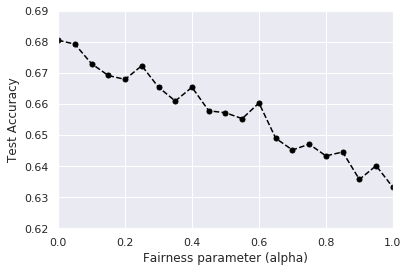

In [33]:
import matplotlib.pyplot as plt
import numpy as np
#alpha_weight parameter
plt.axis([0, 1, 0.62, .69])
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
t=[float(accu_all[i]/100) for i in range(21)] 
print(t)
plt.title('')
 
plt.plot(alpha_weight, t,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)   

plt.show() 

[0.6805, 0.6729, 0.6654, 0.6603, 0.6445, 0.6332]


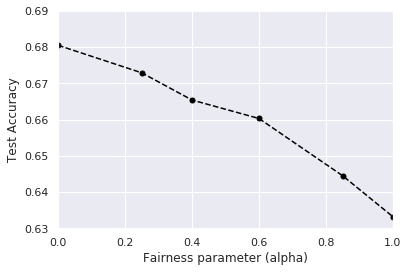

In [36]:
import matplotlib.pyplot as plt
import numpy as np
#alpha_weight parameter
plt.axis([0, 1, 0.63, .69])
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
t=[.6805,.6729,.6654,.6603,.6445,.6332]
print(t)
plt.title('')
alpha_w=[.0,.25,.4,.6,.85,1]
plt.plot(alpha_w, t,color='black', linestyle='dashed', marker='.',markerfacecolor='black', markersize=10)   

plt.show() 



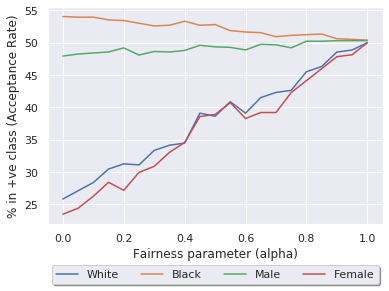

In [39]:
####--->>>  result at  delta1=[.70],gama=[.40],epsilon=[.01]


import pulp as p 
import math
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

#marital
#U=80, M=24928, S=11568, D=4612
# m_3, m_0, m_1, m_2
#age
#>60 and <25= a_1
#>=25and <=60 =a_2
# print(data.head())
# print(data.shape[0],data.shape[1])
 
a=[acceptance_rate[0][i]*100 for i in range(21)]  
b=[acceptance_rate[1][i]*100 for i in range(21)]  
c=[acceptance_rate[2][i]*100 for i in range(21)]  
d=[acceptance_rate[3][i]*100 for i in range(21)]   
 
#'divorced','married','single','unknown'
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha_weight,a,label='White') 
ax.plot(alpha_weight,b,label='Black')  
ax.plot(alpha_weight,c,label='Male') 
ax.plot(alpha_weight,d,label='Female')


   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


plt.show() 

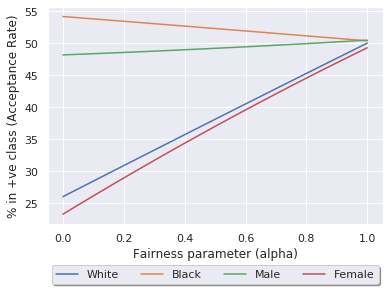

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
# x = np.array([2, 2, 5, 2, 1, 0, 1, 8, 15,13,7,2,0,9,15,6])
y1=savgol_filter(a, 21, 2)
y2=savgol_filter(b, 21, 2)
y3=savgol_filter(c, 21, 2)
y4=savgol_filter(d, 21, 2)





fig = plt.figure()
ax = plt.subplot(111)


ax.plot(alpha_weight,y1,label='White') 
ax.plot(alpha_weight,y2,label='Black')  
ax.plot(alpha_weight,y3,label='Male') 
ax.plot(alpha_weight,y4,label='Female')



   
plt.title('')
ax.set_xlabel('Fairness parameter (alpha)')
ax.set_ylabel('% in +ve class (Acceptance Rate)') 
# ax.set_ylabel('% in +ve class (Acceptance Rate)') 

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), shadow=True, ncol=10)
plt.show() 


[0.6805555555555556, 0.6761363636363636, 0.6799242424242425, 0.6729797979797979, 0.6742424242424242, 0.6736111111111112, 0.6698232323232324, 0.6698232323232324, 0.6698232323232324, 0.6679292929292928, 0.6565656565656566, 0.6571969696969697, 0.6654040404040404, 0.6578282828282828, 0.6521464646464646, 0.6508838383838383, 0.6502525252525253, 0.648989898989899, 0.6470959595959596, 0.6452020202020202, 0.6439393939393939]


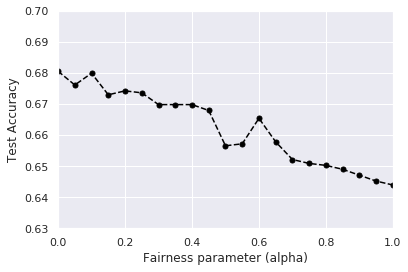

In [41]:
import matplotlib.pyplot as plt
import numpy as np
#alpha_weight parameter
plt.axis([0, 1, 0.63, .70])
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
t=[float(accu_all[i]/100) for i in range(21)] 
print(t)
plt.title('')
 
plt.plot(alpha_weight, t,color='black', linestyle='dashed', marker='.',
     markerfacecolor='black', markersize=10)   

plt.show() 

[0.6805, 0.6729, 0.6698, 0.66729, 0.653, 0.6439]


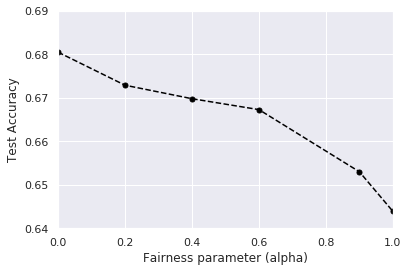

In [42]:
import matplotlib.pyplot as plt
import numpy as np
#alpha_weight parameter
plt.axis([0, 1, 0.64, .69])
plt.xlabel('Fairness parameter (alpha)')
plt.ylabel('Test Accuracy')
t=[.6805,.6729,.6698,.66729,.653,.6439]
print(t)
plt.title('')
alpha_w=[.0,.2,.4,.6,.9,1]
plt.plot(alpha_w, t,color='black', linestyle='dashed', marker='.',markerfacecolor='black', markersize=10)   

plt.show() 

